In [1]:
plt.style.use("ggplot")

In [3]:
df_train = pd.read_csv("../../data/train.csv")
df_test = pd.read_csv("../../data/test.csv")

In [4]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [39]:
y = np.array(df_train["SalePrice"])[np.newaxis]
y

array([[208500, 181500, 223500, ..., 266500, 142125, 147500]], dtype=int64)

In [31]:
x = np.ones([len(df_train), 1])
x = np.hstack((x, np.array(df_train["LotFrontage"])[np.newaxis].T))
x

array([[  1.,  65.],
       [  1.,  80.],
       [  1.,  68.],
       ..., 
       [  1.,  66.],
       [  1.,  68.],
       [  1.,  75.]])

<bound method Series.min of 0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64>

In [73]:
def LinearReg_House(data, target, *features):
    y = np.array(data[target])[np.newaxis].T
    
    X = np.ones([len(data), 1])
    for feature in features:
        X = np.hstack((X, np.array(data[feature])[np.newaxis].T))
    
    w, resid, rank, s = np.linalg.lstsq(X, y)
    
    for i in range(len(w)):
        print("w{} : {}".format(i, w[i]), end = " ")
    print("\n resident : {}".format(resid[0]))
    print("rank : {}".format(rank))
    
    # draw chart
    # 예측치와 실제치과의 관계표시(scatter plot)
    predict = np.dot(X, w)
    
    plt.scatter(y, predict)
    plt.xlabel("target value")
    plt.ylabel("predict value")
    plt.xlim(0, 400000)
    plt.ylim(0, 400000)
    plt.show()

w0 : [ 158911.85567189] w1 : [ 2.05524672] w2 : [ 143.05092067] 
 resident : 8519014271005.482
rank : 3


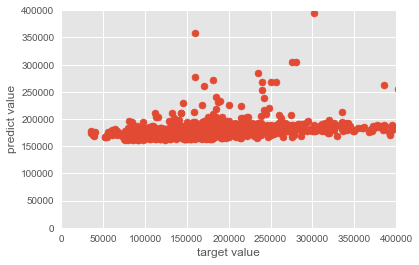

In [74]:
LinearReg_House(df_train, "SalePrice", "LotArea", "PoolArea")